In [125]:
from statistics import mean
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [126]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs**2)))
    
    b = mean(ys) - m*mean(xs)
        
    return m, b

def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig)** 2)

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    
    return 1 - (squared_error_regr/squared_error_y_mean)

def create_dataset(hm, variance, step=2, correlation=False):
    value = 1
    ys = []
    
    for i in range(hm):
        y = value + random.randrange(-variance, variance)
        ys.append(y)
        
        if correlation and correlation == 'pos':
            value += step
        elif correlation and correlation == 'neg':
            value -= step
            
    xs = [i for i in range(hm)]
            
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [127]:
def scatter_plot(x, y, regression_line):
    plt.scatter(x, y, color='#003F72', label = 'data')
    plt.plot(xs, regression_line, label = 'regression line')
    plt.legend(loc=4)
    plt.show()

In [128]:
def create_dataset_and_plot_coefficient(hm, variance, step, correlation):
    xs, ys = create_dataset(hm, variance, step, correlation=correlation)
    m, b = best_fit_slope_and_intercept(xs,ys)
    regression_line = [(m*x)+b for x in xs]
    r_squared = coefficient_of_determination(ys,regression_line)
    print(r_squared)

    scatter_plot(xs, ys, regression_line)

0.556588807449


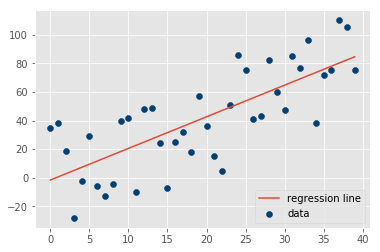

In [129]:
create_dataset_and_plot_coefficient(40, 40, 2, correlation='pos')

0.930372121352


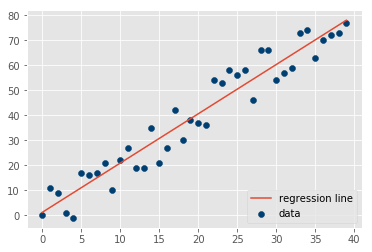

In [130]:
create_dataset_and_plot_coefficient(40, 10, 2, correlation='pos')

0.930660936626


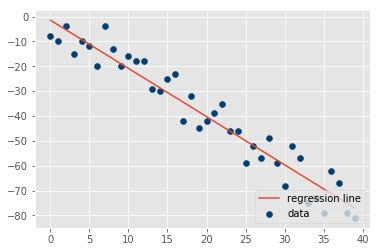

In [133]:
create_dataset_and_plot_coefficient(40, 10, 2, correlation='neg')

0.0233635539955


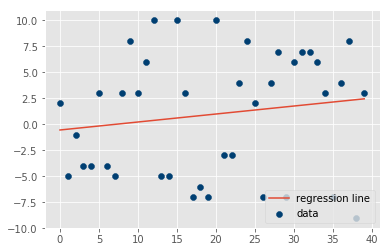

In [135]:
create_dataset_and_plot_coefficient(40, 10, 2, correlation=False)